In [1]:
# the paremeters section
gender = "male"
edu = "bachelor's degree"

In [2]:
# Parameters
gender = "male"
edu = "some college"


In [3]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get urls to download
import requests

# logging to raise warnings/errors within jupyter, zipfile to unzip downloads
import os
import logging
import zipfile

# constat which can be changed
DATA_URL = "https://www.kaggle.com/spscientist/students-performance-in-exams/download"

In [4]:
def download(url, fname):
    print(f"==================== Start Download ====================")
    print(f"url     = {url}")
    print(f"save_to = {fname}")
    
    r = requests.get(url)
    
    if os.path.exists(fname):
        logging.warning("File already exists and was not redownloaded!")
        return
    
    # output to file
    with open(fname, 'wb') as f:
        f.write(r.content)
        
def unzip(folder="data/"):
    print(f"==================== Start Unzip ====================")
    try:
        # looks for zips in the data folder
        fnames = [k[0] for i, j ,k in os.walk(folder) if '.zip' in k[0]]
    except IndexError:
        logging.warning("No zip files to unzip")
        return
    
    # for each zip file, extract all contents
    for fname in fnames:
        print(f"fname   = {fname}")
        with zipfile.ZipFile(folder + fname, 'r') as zip_ref:
            zip_ref.extractall(folder)
    print(f"Unzipped a total of {len(fnames)} file(s). {[i for i in os.listdir('./data') if not '.zip' in i]}")

In [5]:
# run scripts
download(DATA_URL, 'data/students-performance-in-exams.zip')
unzip()

==================== Start Download ====================
url     = https://www.kaggle.com/spscientist/students-performance-in-exams/download
save_to = data/students-performance-in-exams.zip


==================== Start Unzip ====================
fname   = students-performance-in-exams.zip
Unzipped a total of 1 file(s). ['StudentsPerformance.csv']


In [6]:
# load in dataset
data = pd.read_csv("data/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# filter df given specified params via papermill
schedule = data.loc[data['gender'] == gender].loc[data['parental level of education'] == edu]

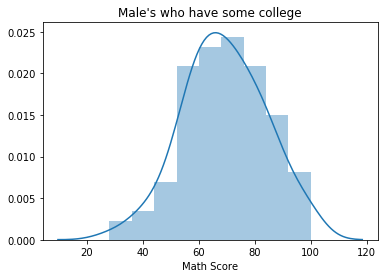

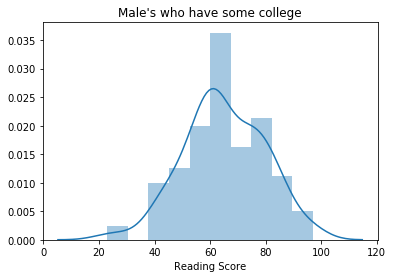

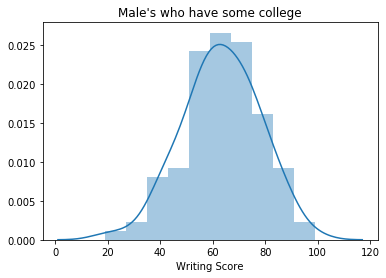

In [8]:
# iteratively create 3 plots given filtered data
for result in ("math score", "reading score", "writing score"):
    sns.distplot(schedule[result])
    
    # plot aethetics
    plt.title(f"{gender.title()}'s who have {edu}")
    plt.xlabel(result.title())
    
    # save plot as jpg for report
    plt.savefig(f"reports/plots/{result}.jpg")
    
    # display coz why not
    plt.show()

In [9]:
# import time to get the current date this report was generated
import pytz, datetime
tzone = pytz.timezone(f'Australia/Melbourne')
time = datetime.datetime.now(tzone).strftime("%d/%m/%Y")

# html template
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Papermill test using some basic data</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h2 align="center">Results for {gender} with {edu}</h1>
      <h3 align="center">Today's date: {time}</h2>
        
      <figure>
        <p style="text-align:center;"><img src="./plots/math score.jpg">
      </figure>
      <figure>
        <p style="text-align:center;"><img src="./plots/reading score.jpg">
      </figure>            
      <figure>
        <p style="text-align:center;"><img src="./plots/writing score.jpg">
      </figure>   
    </html>
'''

In [10]:
# output to html
html_report = f"reports/{gender}_{edu}_report.html"
with open(html_report, "w") as r:
    r.write(report_template)

# convert html to pdf
import pdfkit
pdfkit.from_file(html_report, html_report.replace("html","pdf"))

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True